In [9]:
import numpy as np
import math 
import matplotlib.pyplot as plt
import scipy.linalg
%matplotlib ipympl


The BTCS method for Heat Equation: 

\begin{equation}  \frac{\partial T}{\partial t} = \frac{\partial^2 T}{\partial x^2},\end{equation}



\begin{equation}
\frac{T_{n,i+1}-T_{n,i}}{\Delta t}=\frac{T_{n+1,i+1}-2T_{n,i+1}+T_{n-1,i+1}}{2\Delta x^2}.
\end{equation}


Rearranging,


\begin{equation} -\alpha T_{n-1,i+1}+(1+2\alpha )T_{n,i+1}-\alpha T_{n+1,i+1} = -T_{n,j}\end{equation}

where, \begin{equation}
\alpha = \frac{\Delta T}{\Delta x^2} \end{equation}



\begin{equation} A\mathbf{T}_{i+1}=B\mathbf{T}_{i} +\mathbf{b}_{i+1} \end{equation}



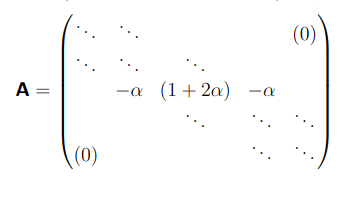
for $i$ from $1$  to $N-1$, whereas at $i = 0$ and $i = N$, $T$ is 0, which are the boundary conditions. 


In [10]:
# x axis things
    #No: of x grid points of interest

Nx = 100
    #Minimum and maximum of x

xi = -1
xf = 1

#Ghost cells. Need to be fixed throught the solution

Ng = 2

N = Ng+Nx
dx = (xf - xi)/(Nx)
x = np.linspace(xi, xf, N)

ti = 0
tf = 1

r= 1/4 #dt/(dx**2)

dt = 0.1 * dx
t = np.arange(0, 1+dt, dt)

time = 0
tmax = 0.25

T=np.zeros(N)

#Initial Conditions
 
pos = int(Nx/2)
T[pos] = 1/(2*dx)
T[pos + 1] = 1/(2*dx)
    

In [11]:
#A digonal matrix
A = np.diag([1+2*r]*(N-2)) + np.diag([-r]*(N-3),-1) + np.diag([-r]*(N-3),1)
b=np.zeros(N-2)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
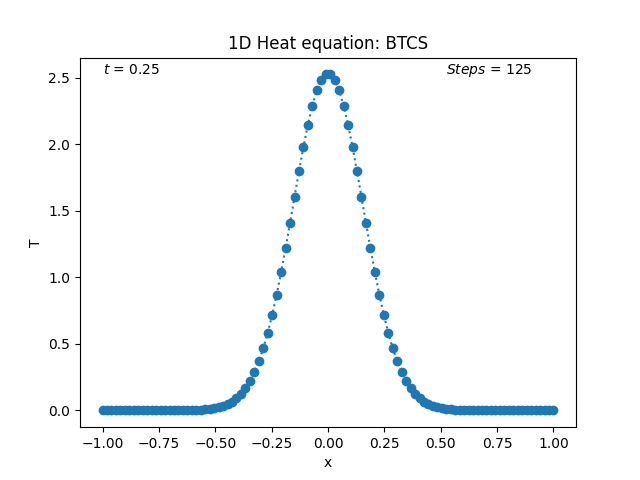

In [12]:
time = 0 #initail time
steps = 0 #irtative Steps
while time<tmax:
        # values of b at x = 0 at all times (i.e. 0)

    b[0]= r * T[0]
   
        # values of b at x = N at all times (i.e. 0)

    b[N-3] = r*T[N-1]

      #Solving the matrix A to get the solution for w[(1,2,...,N-1),j+1]


    T[1:N-1]= scipy.linalg.solve(A, T[1:N-1])
    time +=dt 
    steps+=1
    

plt.title("1D Heat equation: BTCS")
plt.plot(x, T, ":o")
plt.xlabel('x')
plt.ylabel('T')
plt.text(x[0], np.max(T), "$t$ = " + str(round(time, 2)))
plt.text(x[-int(Nx/4)], np.max(T), "$Steps$ = " + str(steps))

plt.show()
